<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/tf2ss_chapter_6_exmaple_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 4.6 MB/s eta 0:00:00


In [3]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Open loop TF =  
                 1
-----------------------------------
2 s^5 + 3 s^4 + 2 s^3 + 3 s^2 + 2 s

Closed loop TF =  
                   1
---------------------------------------
2 s^5 + 3 s^4 + 2 s^3 + 3 s^2 + 2 s + 1

Poles =  [-1.3306863 +0.j          0.32843714+0.88991435j  0.32843714-0.88991435j
 -0.41309399+0.4969236j  -0.41309399-0.4969236j ]
Zeros =  []


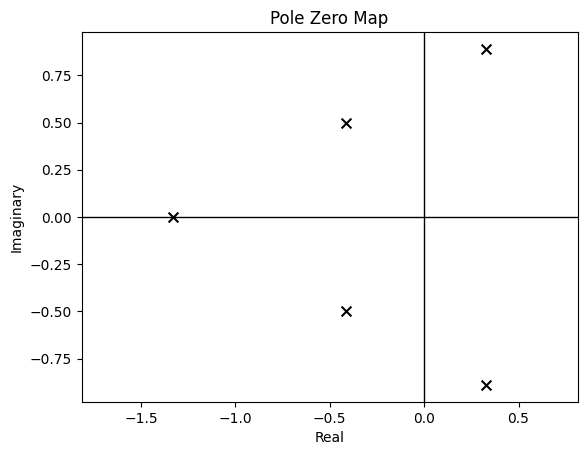

In [4]:
# Define your transfer function:
#G(s) = 1 / s(2s^4+3s^3+2s^2+3s+2)

# Coefficients of the numerator
num = [1]
# Coefficients of the denominator
den = np.polymul([1, 0],[2, 3, 2, 3, 2])

G = tf(num,den)
print ("Open loop TF = ", G)

# close loop transfer function
TF = feedback(G,1)
print ("Closed loop TF = ", TF)

(p,z) = pzmap(TF)

print("Poles = ",p)
print("Zeros = ",z)

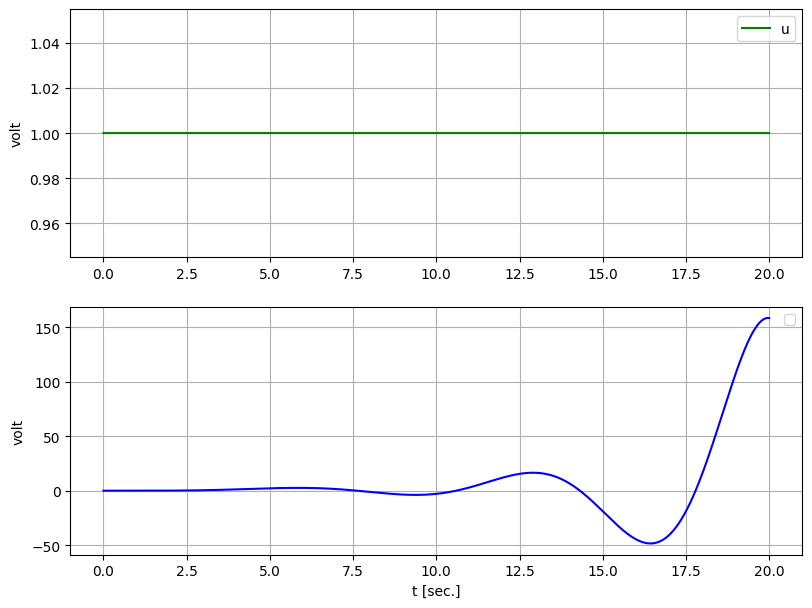

In [5]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 20
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(TF, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.subplot(2,1,1)
plt.plot(t, u, "green")

plt.grid()
plt.legend(labels =("u"))
plt.ylabel("volt")

plt.subplot(2,1,2)
plt.legend(labels =("y"))
plt.plot(t, y, "blue")
plt.grid()
plt.xlabel("t [sec.]")
plt.ylabel("volt")

plt.savefig("sim_tf.pdf")